In [9]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
FS=20
matplotlib.rcParams.update({'font.size': FS}) # set font size
import main_learning_function as learn

In [10]:
np.random.seed(1)
sweep={'loop_parameter': 'coupling_function',
       'loop_parameter_list':[lambda x: 0.383+1.379*np.sin(x+3.93)+0.568*np.sin(2*x+0.11)+0.154*np.sin(3*x+2.387)],
       'overwrite_default_parameters': {
            'coupling_function_names': ['Hodgkin-Huxley'],
            'num_attempts': 1, # number of times to attempt to learn from data for each network
            'num_networks': 1, # number of different networks for each parameter value
            'num_repeats': 10, # number of different networks for each parameter value
            'mu_freq': 1.0, # mean natural frequency
            'sigma_freq':0.5,  #0.0001 # std natural frequency
            'show_plots':True,
            'save_results':False,
            'with_pikovsky':False,
            'return_last_results': True,
            'tmax': 20}
        }


C:\Users\mpanaggio\Box\MRC\learn_model_fourier\learn_network_structure\learn_kuramoto_files.py:38: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  size=(num_osc,num_osc)))
C:\Users\mpanaggio\AppData\Local\Continuum\anaconda3\envs\clean\lib\site-packages\numpy\lib\type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


******************************************************************
Loop parameter: coupling_function
Current parameter value: Hodgkin-Huxley

Parameter 1 out of 1
Network 1 out of 1
Fit attempt 1 out of 1

Now learning parameters:

Epoch: 0 Batch error: 1.5067353 Val error: 1.4799224...................
Epoch: 20 Batch error: 0.1697322 Val error: 0.16046318...................
Epoch: 40 Batch error: 0.031944264 Val error: 0.03381587...................
Epoch: 60 Batch error: 0.011442143 Val error: 0.009626304...................
Epoch: 80 Batch error: 0.004846808 Val error: 0.004430268...................
Epoch: 100 Batch error: 0.003794554 Val error: 0.0038372446...................
Epoch: 120 Batch error: 0.0037956 Val error: 0.0036449097...................
Epoch: 140 Batch error: 0.0029335686 Val error: 0.0035253072...................
Epoch: 160 Batch error: 0.0047253743 Val error: 0.0034602694...................
Epoch: 180 Batch error: 0.0044645104 Val error: 0.0034464803................

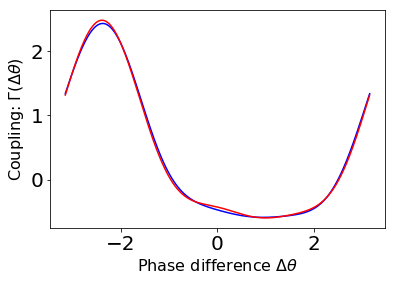

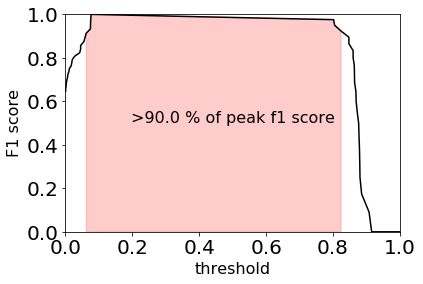

In [11]:
predA,predw,fout,K,error_val,system_params,solution_params,learning_params,c,testX1=learn.kuramoto_learn_function(sweep['loop_parameter'], # parameter to vary
                                  sweep['loop_parameter_list'], # list of values for parameter
                                  **sweep['overwrite_default_parameters'])

matrix([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

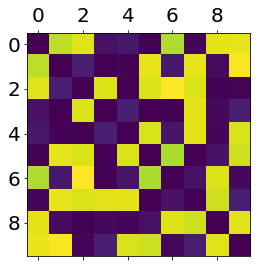

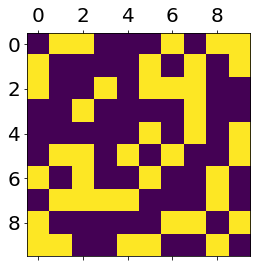

In [39]:
plt.matshow(A_pred)
plt.matshow(A_true)
(A_pred>0.9 for t)*1-A_true

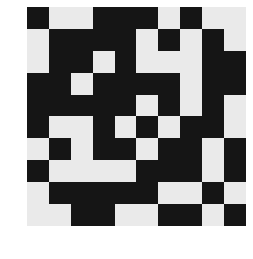

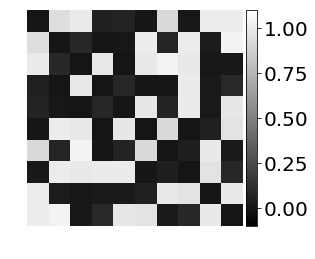

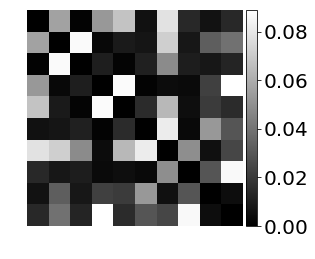

In [12]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
A_true=system_params['A']
A_pred=predA*K/c[1]

vmin=-0.1
vmax=1.1

for val in range(3):
    if val==0:
        M=A_true
    elif val==1:
        M=A_pred
    elif val==2:
        M=np.abs(A_pred-A_true)
        
    fig=plt.figure()
    ax=plt.gca()

    if not(val==2):
        p=ax.imshow(M,cmap='gray',vmin=vmin, vmax=vmax)
    else:
        p=ax.imshow(M,cmap='gray')
    plt.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cb=plt.colorbar(p,cax=cax)
    if (val==0): 
        cb.remove()
    if val==0:
        filename='true_A'
    elif val==1:
        filename='pred_A'
    elif val==2:
        filename='difference'
    
    fn_str='../../../../Dropbox (Personal)/MRC/figures_to_keep/{}.{}'
    fig.tight_layout()
    for file_type in ['png','eps']:
        fig.savefig(fn_str.format(filename,file_type))
        
plt.show()


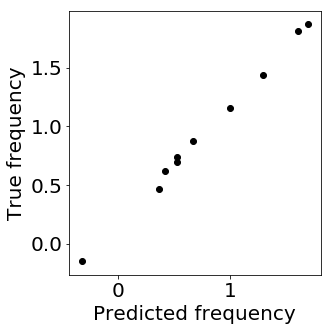

In [40]:
w_true=system_params['w']
Nj=(predA/c[1]).sum(axis=0)
num_osc=len(w_true)
w_pred=predw-K*Nj*c[0]/num_osc

fig=plt.figure(figsize=(5,5))
plt.scatter(w_pred,w_true,c='k')
#plt.plot([0,2],[0,2],'r')
plt.xlabel('Predicted frequency')
plt.ylabel('True frequency')
filename='frequency_example'
fn_str='../../../../Dropbox (Personal)/MRC/figures_to_keep/{}.{}'
fig.tight_layout()
for file_type in ['png','eps']:
    fig.savefig(fn_str.format(filename,file_type))

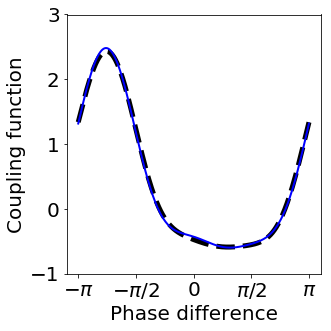

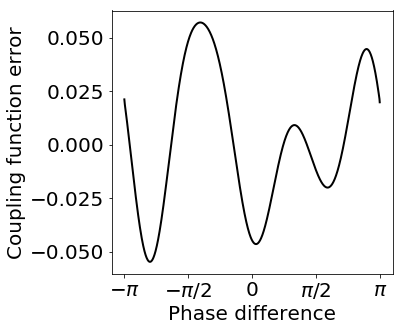

In [43]:
from scipy import optimize
n_pts=1000 # points for interpolation

# reshape and sort vectors
fout_v2=np.reshape(fout,(-1,))
X1_v2=np.angle(np.exp(1j*np.reshape(testX1,(-1,))))
X1_v3, fout_v3=(np.array(t) for t in zip(*sorted(zip(X1_v2,fout_v2))))


# interpolate 
x_for_fout=np.linspace(-np.pi,np.pi,n_pts,endpoint=True)
predF=np.interp(x_for_fout,X1_v3,fout_v3)
correctF=system_params['Gamma'](x_for_fout)

# find best scaling for coupling function
#area_diff_func=lambda c: np.trapz(np.abs(c*predF-correctF),x_for_fout)
#res=optimize.minimize_scalar(area_diff_func,bounds=(-100,100))
area_diff_func=lambda c: np.trapz(np.abs(c[0]+c[1]*predF-correctF),x_for_fout)
res=optimize.minimize(area_diff_func,x0=np.array([0,1]),bounds=[(-10,10),(-100,100)])
c=res.x    

for val in range(2):
    if val==1:
        fig=plt.figure(figsize=(6,5))
    else:
        fig=plt.figure(figsize=(5,5))
    ax=plt.gca()
    if val==0:
        plt.plot(x_for_fout,c[0]+c[1]*predF,'black',linestyle='dashed',linewidth=5)
        plt.plot(x_for_fout,correctF,'blue',linewidth=2)
        ax.set_yticks([-1,0,1,2,3])
        plt.xlabel('Phase difference')
        plt.ylabel('Coupling function')
    else:
        plt.plot(x_for_fout,(c[0]+c[1]*predF-correctF),'black',linestyle='solid',linewidth=2)
        plt.xlabel('Phase difference')
        plt.ylabel('Coupling function error')
        
    ax.set_xticks(np.linspace(-np.pi,np.pi,5))
    ax.set_xticklabels([r'$-\pi$',r'$-\pi/2$',r'$0$',r'$\pi/2$',r'$\pi$'])
    if val==0:
        filename='coupling_function_raw'
    elif val==1:
        filename='coupling_function_difference'
    
    fn_str='../../../../Dropbox (Personal)/MRC/figures_to_keep/{}.{}'
    fig.tight_layout()
    for file_type in ['png','eps']:
        fig.savefig(fn_str.format(filename,file_type))

